In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

In [2]:
current_dir = os.getcwd()
print(f"Diretório de trabalho atual: {current_dir}")

caminho_relativo = r'..\..\data\dados_balanceados.csv'

if os.path.exists(caminho_relativo):
    dados = pd.read_csv(caminho_relativo)
    print(dados.head())
else:
    print(f"Arquivo não encontrado: {caminho_relativo}")

Diretório de trabalho atual: c:\Users\herbe\Desktop\JaPodeVoar-main\app\models
  Airline  Flight AirportFrom AirportTo  DayOfWeek  Time  Length  Delay
0      OO    6663         DEN       EUG          1   730     173      0
1      EV    5593         ATL       ICT          3  1155     146      1
2      OO    4826         FAR       SLC          1   375     150      1
3      EV    5355         XNA       DTW          1  1056     127      0
4      CO     732         IAH       LGA          3  1135     193      1


In [3]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

# Criar instâncias do LabelEncoder
le_airline = LabelEncoder()
le_airportfrom = LabelEncoder()
le_airportto = LabelEncoder()

# Aplicar a codificação de rótulos nas colunas categóricas
dados['Airline'] = le_airline.fit_transform(dados['Airline'])
dados['AirportFrom'] = le_airportfrom.fit_transform(dados['AirportFrom'])
dados['AirportTo'] = le_airportto.fit_transform(dados['AirportTo'])

# Verificar a transformação
print(dados.head())

   Airline  Flight  AirportFrom  AirportTo  DayOfWeek  Time  Length  Delay
0       12    6663           79         93          1   730     173      0
1        6    5593           16        135          3  1155     146      1
2       12    4826           99        260          1   375     150      1
3        6    5355          289         85          1  1056     127      0
4        4     732          134        158          3  1135     193      1


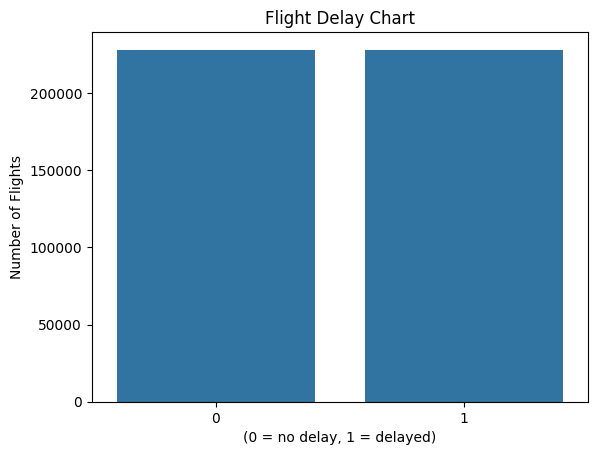

In [4]:
# Visualização se target está balanceado
sns.countplot(x = 'Delay', data = dados)
plt.title('Flight Delay Chart')
plt.xlabel('(0 = no delay, 1 = delayed)')
plt.ylabel('Number of Flights')
plt.show()

In [5]:
# Separar target dos atributos
X = dados.iloc[:, 0:7] # Atributos 
y = dados.iloc[:, 7] # Taget

In [6]:
X

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length
0,12,6663,79,93,1,730,173
1,6,5593,16,135,3,1155,146
2,12,4826,99,260,1,375,150
3,6,5355,289,85,1,1056,127
4,4,732,134,158,3,1135,193
...,...,...,...,...,...,...,...
456323,13,369,79,213,1,705,178
456324,12,4839,2,260,2,660,115
456325,15,2982,33,85,4,700,95
456326,7,671,172,79,7,1017,239


In [7]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_standard = scaler.fit_transform(X)

In [8]:
X_standard[0]

array([ 0.4791072 ,  2.00972484, -0.81198287, -0.62235473, -1.52503743,
       -0.27617382,  0.94903353])

In [9]:
obj_norm = MinMaxScaler().fit(X)
X_normalization = obj_norm.transform(X)
X_normalization


array([[0.70588235, 0.85268143, 0.27147766, ..., 0.        , 0.50384885,
        0.57692308],
       [0.35294118, 0.71573019, 0.05498282, ..., 0.33333333, 0.80125962,
        0.47307692],
       [0.70588235, 0.61756048, 0.34020619, ..., 0.        , 0.25542337,
        0.48846154],
       ...,
       [0.88235294, 0.38154358, 0.11340206, ..., 0.5       , 0.48285514,
        0.27692308],
       [0.41176471, 0.08575451, 0.59106529, ..., 1.        , 0.70468859,
        0.83076923],
       [0.70588235, 0.90247024, 0.27147766, ..., 0.83333333, 0.34359692,
        0.40384615]])

In [10]:
X

,Airline,Flight,AirportFrom,AirportTo,DayOfWeek,Time,Length
0,12,6663,79,93,1,730,173
1,6,5593,16,135,3,1155,146
2,12,4826,99,260,1,375,150
3,6,5355,289,85,1,1056,127
4,4,732,134,158,3,1135,193
...,...,...,...,...,...,...,...
456323,13,369,79,213,1,705,178
456324,12,4839,2,260,2,660,115
456325,15,2982,33,85,4,700,95
456326,7,671,172,79,7,1017,239


In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X_normalization, y, test_size = 0.3, random_state=0)

In [12]:
x_train.shape, y_train.shape

((319429, 7), (319429,))

In [13]:
x_test.shape, y_test.shape

((136899, 7), (136899,))

In [14]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, ConfusionMatrixDisplay, classification_report

knn = KNeighborsClassifier(n_neighbors = 5)
clf = RandomForestClassifier(n_estimators = 200, max_depth=2, random_state=0)
logreg = LogisticRegression()
mlp = MLPClassifier(learning_rate_init=0.001, hidden_layer_sizes=(5,10), activation='relu')


In [15]:
def mymodel(model):
  model.fit(x_train, y_train)
  y_pred = model.predict(x_test)
  print(accuracy_score(y_test, y_pred))
  print(classification_report(y_test, y_pred))
  ConfusionMatrixDisplay.from_estimator(model, x_test, y_test)
  plt.show()

0.6084339549594957
              precision    recall  f1-score   support

           0       0.61      0.61      0.61     68371
           1       0.61      0.60      0.61     68528

    accuracy                           0.61    136899
   macro avg       0.61      0.61      0.61    136899
weighted avg       0.61      0.61      0.61    136899



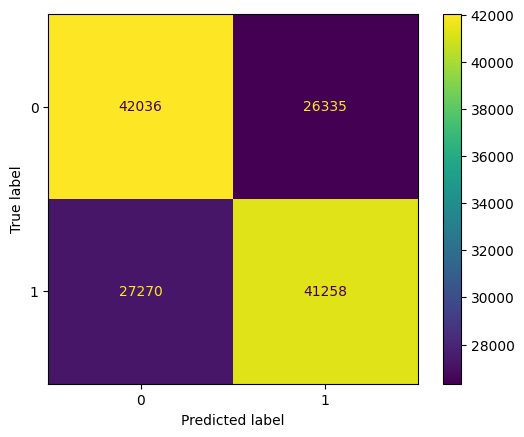

In [16]:
mymodel(knn)

0.5954389732576572
              precision    recall  f1-score   support

           0       0.58      0.70      0.63     68371
           1       0.62      0.49      0.55     68528

    accuracy                           0.60    136899
   macro avg       0.60      0.60      0.59    136899
weighted avg       0.60      0.60      0.59    136899



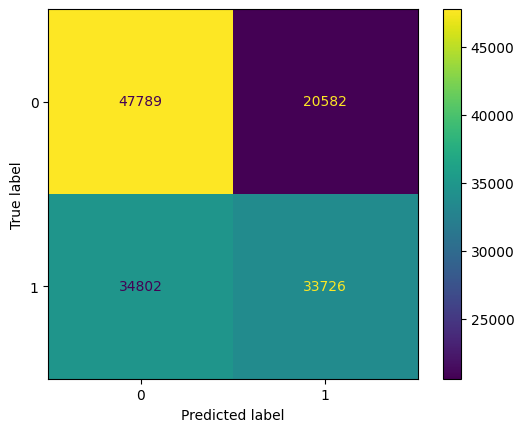

In [17]:
mymodel(clf)

0.5810414977465138
              precision    recall  f1-score   support

           0       0.58      0.58      0.58     68371
           1       0.58      0.58      0.58     68528

    accuracy                           0.58    136899
   macro avg       0.58      0.58      0.58    136899
weighted avg       0.58      0.58      0.58    136899



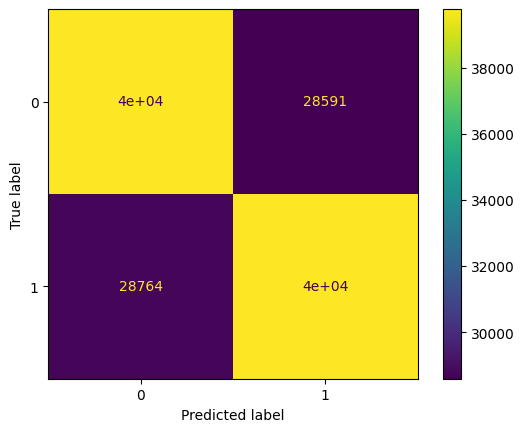

In [18]:
mymodel(logreg)

0.6214143273508207
              precision    recall  f1-score   support

           0       0.59      0.77      0.67     68371
           1       0.67      0.48      0.56     68528

    accuracy                           0.62    136899
   macro avg       0.63      0.62      0.61    136899
weighted avg       0.63      0.62      0.61    136899



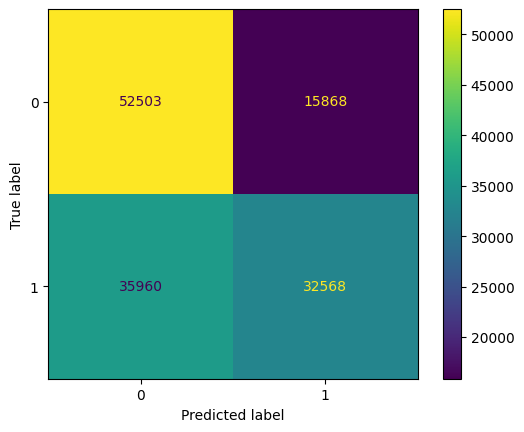

In [19]:
mymodel(mlp)

In [20]:
import joblib

# Salvar o modelo e os encoders
joblib.dump(mlp, 'mlp_model.pkl')
joblib.dump(le_airline, 'le_airline.pkl')
joblib.dump(le_airportfrom, 'le_airportfrom.pkl')
joblib.dump(le_airportto, 'le_airportto.pkl')
joblib.dump(scaler, 'scaler.pkl')

print("Modelo e encoders salvos.")

Modelo e encoders salvos.


In [21]:
if not os.path.exists('data'):
    os.makedirs('data')

# Salvar o DataFrame como um arquivo CSV na pasta 'data'
dados.to_csv('../../data/dados_balanceades.csv', index=False)

# Exibir uma mensagem confirmando que o arquivo foi salvo
print("Arquivo salvo como 'data/dados_balanceades.csv'")

Arquivo salvo como 'data/dados_balanceades.csv'


In [22]:
current_dir = os.getcwd()
print(f"Diretório de trabalho atual: {current_dir}")

caminho_relativo = r'..\..\data\dados_balanceades.csv'

if os.path.exists(caminho_relativo):
    df = pd.read_csv(caminho_relativo)
    print(df.head())
else:
    print(f"Arquivo não encontrado: {caminho_relativo}")

Diretório de trabalho atual: c:\Users\herbe\Desktop\JaPodeVoar-main\app\models
   Airline  Flight  AirportFrom  AirportTo  DayOfWeek  Time  Length  Delay
0       12    6663           79         93          1   730     173      0
1        6    5593           16        135          3  1155     146      1
2       12    4826           99        260          1   375     150      1
3        6    5355          289         85          1  1056     127      0
4        4     732          134        158          3  1135     193      1


In [23]:
df_group = pd.pivot_table(data=df,index='Airline',columns='Delay',aggfunc='count')

In [24]:

# Verifique se a coluna 'Delay' existe e seus valores únicos
if 'Delay' in df.columns:
    print(df['Delay'].unique())

# Crie a tabela dinâmica
df_group = pd.pivot_table(data=df, index='Airline', columns='Delay', aggfunc='size', fill_value=0)

# Renomeie as colunas se necessário
df_group.columns = [str(col) for col in df_group.columns]

# Exiba o DataFrame resultante
print(df_group)

[0 1]
             0      1
Airline              
0         9942   8226
1        20596  16507
2         5274   3308
3         6952   7379
4         6610  10309
5        24822  25176
6        13389  11255
7         2850   2899
8        11481   6109
9         2579   1380
10       19176  12742
11        7244   3502
12       21938  22760
13       12359   7003
14       16909  10306
15       22304  64174
16       15406  11795
17        8333   3334


In [25]:
df_group['Total_flights'] = df_group['0'] + df_group['1']

In [26]:
df_group['Delay_index'] = df_group['1'] / df_group['Total_flights']
df_group.reset_index(inplace=True)

In [27]:
# Create a pivot table for AirportTo
df_group_airportTo = pd.pivot_table(data=df, index='AirportTo', columns='Delay', aggfunc='size', fill_value=0)

# Rename the columns if necessary
df_group_airportTo.columns = [str(col) for col in df_group_airportTo.columns]

# Add Delay and OnTime columns
df_group_airportTo['Delay'] = df_group_airportTo['1']
df_group_airportTo['OnTime'] = df_group_airportTo['0']

# Display the resulting DataFrame
print(df_group_airportTo)

             0     1  Delay  OnTime
AirportTo                          
0          142   135    135     142
1          108    70     70     108
2          901  1643   1643     901
3            1     1      1       1
4           43    27     27      43
...        ...   ...    ...     ...
287        307   235    235     307
288         33    21     21      33
289        568   405    405     568
290         32    17     17      32
291        198    86     86     198

[292 rows x 4 columns]


In [28]:
df_group_airportTo['Total_flights']= df_group_airportTo['Delay'] + df_group_airportTo['OnTime']

In [29]:
df_group_airportTo['Delay_index']= df_group_airportTo['Delay']/df_group_airportTo['Total_flights']
df_group_airportTo.reset_index(inplace = True)

In [30]:
df_group_airportFrom = pd.pivot_table(data=df,index='AirportFrom',columns='Delay',aggfunc='count')

In [31]:
# Create a pivot table for AirportFrom
df_group_airportFrom = pd.pivot_table(data=df, index='AirportFrom', columns='Delay', aggfunc='size', fill_value=0)

# Rename the columns if necessary
df_group_airportFrom.columns = [str(col) for col in df_group_airportFrom.columns]

# Add Delay and OnTime columns
df_group_airportFrom['Delay'] = df_group_airportFrom['1']
df_group_airportFrom['OnTime'] = df_group_airportFrom['0']

In [32]:
df_group_airportFrom['Total_flights']= df_group_airportFrom['Delay'] + df_group_airportFrom['OnTime']

In [33]:
df_group_airportFrom['Delay_index']= df_group_airportFrom['Delay']/df_group_airportFrom['Total_flights']
df_group_airportFrom.reset_index(inplace = True)

In [34]:
df = pd.merge(df, df_group[['Airline', 'Delay_index']], on = ['Airline'], how = 'left')

In [35]:
df = pd.merge(df, df_group_airportFrom[['AirportFrom', 'Delay_index']], on = ['AirportFrom'], how = 'left')

In [36]:
df = pd.merge(df, df_group_airportTo[['AirportTo', 'Delay_index']], on = ['AirportTo'], how = 'left')

In [37]:
df.rename(columns={'Delay_index_x':'delay_airline'}, inplace=True)
df.rename(columns={'Delay_index_y':'delay_airportfrom'}, inplace=True)
df.rename(columns={'Delay_index':'delay_airportto'}, inplace=True)

In [38]:
def airline(airline):
    if airline <= 0.30:
        return 0
    elif airline > 0.30 and airline <= 0.45:
        return 1
    elif airline > 0.45 and airline <= 0.60:
        return 2
    else:
        return 3

In [39]:
df['airline_group'] = df.apply(lambda x: airline(x['delay_airline']),axis=1)

In [40]:
def airportfrom(airport):
    if airport <= 0.25:
        return 0
    elif airport > 0.25 and airport <= 0.40:
        return 1
    elif airport > 0.40 and airport <= 0.60:
        return 2
    else:
        return 3

In [41]:
df['airportfrom_group'] = df.apply(lambda x: airportfrom(x['delay_airportfrom']),axis=1)

In [42]:
def airportto(airport):
    if airport <= 0.27:
        return 0
    elif airport > 0.27 and airport <= 0.40:
        return 1
    elif airport > 0.40 and airport <= 0.60:
        return 2
    else:
        return 3

In [43]:
df['airportto_group'] = df.apply(lambda x: airportto(x['delay_airportto']),axis=1)

In [44]:
df = df.reindex(['DayOfWeek', 'Time', 'Length', 'airline_group',
       'airportfrom_group', 'airportto_group', 'Delay'], axis=1)

<Axes: >

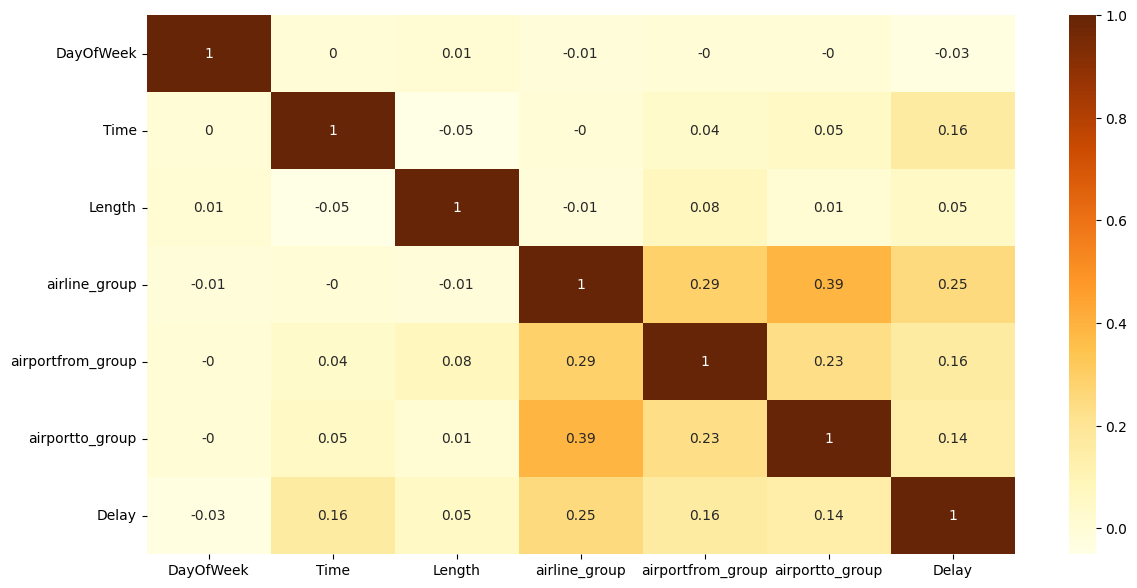

In [45]:
correlation = df.corr().round(2)
plt.figure(figsize = (14,7))
sns.heatmap(correlation, annot = True, cmap = 'YlOrBr')

In [46]:
X = df.iloc[:, 0:6].values

In [47]:
y = df.iloc[:, 6].values

In [48]:
obj_norm = MinMaxScaler().fit(X)
X_normalization = obj_norm.transform(X)
X_normalization[0]

array([0.        , 0.50384885, 0.57692308, 0.66666667, 0.66666667,
       0.66666667])

In [49]:
x_train, x_test, y_train, y_test = train_test_split(X_normalization, y, test_size = 0.3, random_state = 0)

In [50]:
x_train.shape, y_train.shape

((319429, 6), (319429,))

In [51]:
x_test.shape, y_test.shape

((136899, 6), (136899,))

0.6005230133163866
              precision    recall  f1-score   support

           0       0.60      0.61      0.60     68371
           1       0.60      0.59      0.60     68528

    accuracy                           0.60    136899
   macro avg       0.60      0.60      0.60    136899
weighted avg       0.60      0.60      0.60    136899



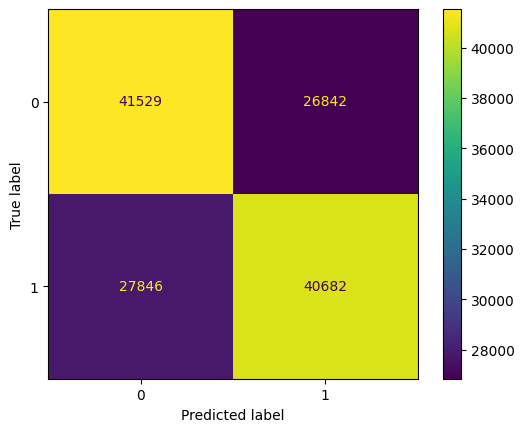

In [52]:
mymodel(knn)

0.5993250498542722
              precision    recall  f1-score   support

           0       0.57      0.81      0.67     68371
           1       0.67      0.39      0.49     68528

    accuracy                           0.60    136899
   macro avg       0.62      0.60      0.58    136899
weighted avg       0.62      0.60      0.58    136899



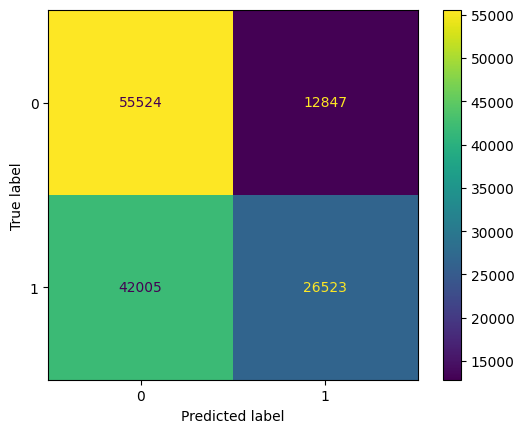

In [53]:
mymodel(clf)

0.6234523261674665
              precision    recall  f1-score   support

           0       0.62      0.65      0.63     68371
           1       0.63      0.60      0.61     68528

    accuracy                           0.62    136899
   macro avg       0.62      0.62      0.62    136899
weighted avg       0.62      0.62      0.62    136899



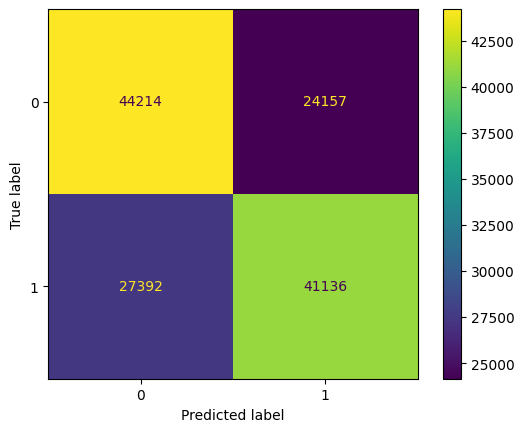

In [54]:
mymodel(logreg)

0.6265494999963477
              precision    recall  f1-score   support

           0       0.62      0.67      0.64     68371
           1       0.64      0.58      0.61     68528

    accuracy                           0.63    136899
   macro avg       0.63      0.63      0.63    136899
weighted avg       0.63      0.63      0.63    136899



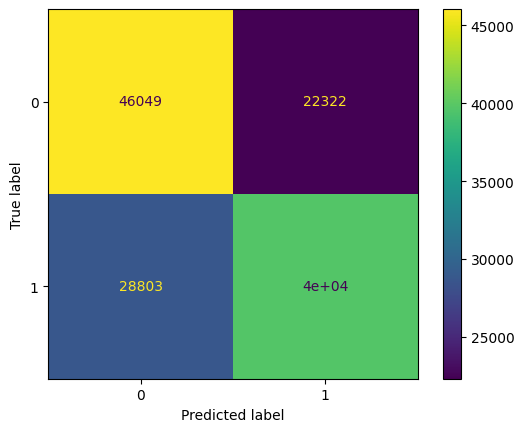

In [55]:
mymodel(mlp)

In [56]:
mlp.predict(x_test)

array([0, 1, 0, ..., 1, 0, 0])

In [57]:
x_test

array([[0.33333333, 0.33519944, 0.1       , 0.66666667, 0.66666667,
        0.66666667],
       [1.        , 0.70678796, 0.41153846, 0.66666667, 0.66666667,
        0.66666667],
       [0.83333333, 0.43386984, 0.21923077, 0.33333333, 0.33333333,
        0.66666667],
       ...,
       [0.83333333, 0.6053184 , 0.98846154, 0.33333333, 0.66666667,
        0.66666667],
       [0.83333333, 0.44156753, 0.80769231, 0.33333333, 0.66666667,
        0.66666667],
       [0.66666667, 0.27291812, 0.52307692, 0.33333333, 0.66666667,
        0.66666667]])

In [58]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)
scores

array([0.60176846, 0.6016041 , 0.60103434, 0.59949597, 0.60064647])

In [59]:
print("%0.2f de acurácia média com um desvio padrão de %0.2f" % (scores.mean(), scores.std()))

0.60 de acurácia média com um desvio padrão de 0.00


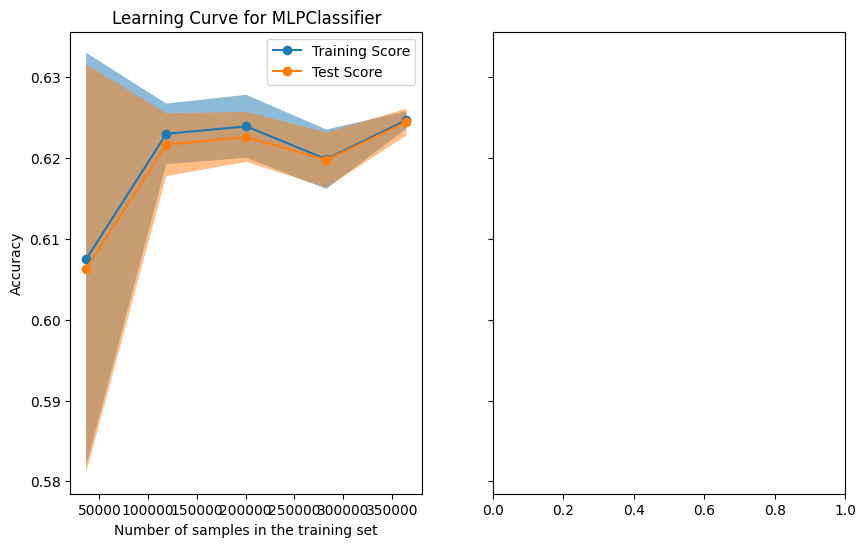

In [60]:
from sklearn.model_selection import LearningCurveDisplay

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(10, 6), sharey=True)

common_params = {
    "X": X,
    "y": y,
    "train_sizes": np.linspace(0.1, 1.0, 5),
    "score_type": "both",
    "n_jobs": 4,
    "line_kw": {"marker": "o"},
    "std_display_style": "fill_between",
    "score_name": "Accuracy",
}

for ax_idx, model in enumerate([mlp]):
    LearningCurveDisplay.from_estimator(model, **common_params, ax=ax[ax_idx])
    handles, label = ax[ax_idx].get_legend_handles_labels()
    ax[ax_idx].legend(handles[:2], ["Training Score", "Test Score"])
    ax[ax_idx].set_title(f"Learning Curve for {model.__class__.__name__}")